In [1]:
# Source

#https://www.youtube.com/watch?v=cbqZa_1vzcg&list=PLeo1K3hjS3uu7clOTtwsp94PcHbzqpAdg&index=4&ab_channel=codebasics

#https://github.com/codebasics/py/blob/master/DataScience/BangloreHomePrices/model/banglore_home_prices_final.ipynb

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Load: Load banglore home prices into a dataframe

	Drop features that are not required to build our model


In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Real Estate Price Prediction/house_prices.csv')
df1.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [4]:
df1.shape

(13320, 9)

<Axes: xlabel='area_type', ylabel='count'>

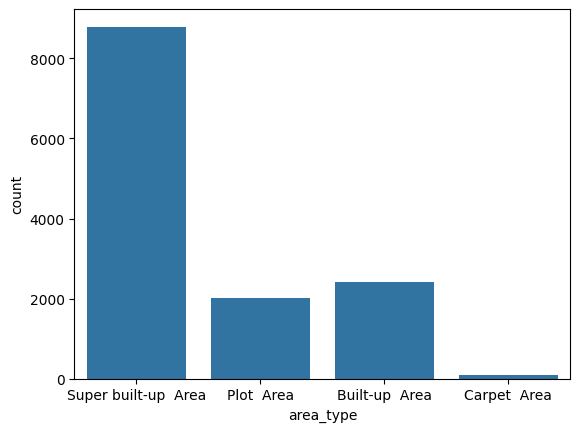

In [5]:
sns.countplot(x='area_type', data=df1)

In [6]:
df1.groupby('availability')['availability'].agg('count')

,availability
availability,
14-Jul,1
14-Nov,1
15-Aug,1
15-Dec,1
15-Jun,1
...,...
22-Mar,3
22-May,10
22-Nov,2


In [7]:
df1['society'].value_counts()

,count
society,
GrrvaGr,80
PrarePa,76
Sryalan,59
Prtates,59
GMown E,56
...,...
Amionce,1
JaghtDe,1
Jauraht,1


In [8]:
'''

Here we are going to remove unwanted columns which won't affect the dependant feature
[ area_type,	availability, society, balcony ]


'''

"\n\nHere we are going to remove unwanted columns which won't affect the dependant feature\n[ area_type,\tavailability, society, balcony ]\n\n\n"

In [9]:
df2 = df1.drop([ 'area_type',	'availability', 'society', 'balcony'], axis='columns')
df2.head(5)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [10]:
df2.shape

(13320, 5)

Data Cleaning: Handle NA values

In [11]:
df2.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [12]:
# The empty value rows are very few. So we can eliminate them without any hesitation.
df3 = df2.dropna()
df3.shape

(13246, 5)

In [13]:
df3.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


Feature Engineering

	Add new feature(integer) for bhk (Bedrooms Hall Kitchen)
	Handle range values in toal_sqft feature
	Add new feature called price per square feet

1. Add new feature(integer) for bhk (Bedrooms Hall Kitchen)

In [14]:
df3.head(5)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [15]:
df3['size'].value_counts()

,count
size,
2 BHK,5198
3 BHK,4286
4 Bedroom,818
4 BHK,577
3 Bedroom,546
1 BHK,531
2 Bedroom,329
5 Bedroom,296
6 Bedroom,191


In [16]:

df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head(5)

<ipython-input-16-e8bf3b0c499c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [17]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [18]:
df3.head(5)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


2. Handle range values in toal_sqft feature


In [19]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
def isFloat(x):
  try:
    float(x)
  except:
    return False
  return True


In [21]:
df3[~df3['total_sqft'].apply(isFloat)]


,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [22]:
def convert_sqft_to_num(x):
  tokens = x.split('-')
  if(len(tokens) == 2):
    return ((float(tokens[0]) + float(tokens[1]))/2)
  try:
    return float(x)
  except:
    return None


In [23]:
df4 = df3.copy()
df4['total_sqft'] = df4.total_sqft.apply(convert_sqft_to_num)

In [24]:
df4.loc[30]

,30
location,Yelahanka
size,4 BHK
total_sqft,2475.0
bath,4.0
price,186.0
bhk,4


3. Add new feature called price per square feet

In [25]:
df4.head(5)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [26]:
df5 = df4.copy()

In [27]:
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


Dimensionality Reduction

	Any location having less than 10 data points should be tagged as "other" location.


In [28]:
df5['location'].value_counts()

,count
location,
Whitefield,534
Sarjapur Road,392
Electronic City,302
Kanakpura Road,266
Thanisandra,233
...,...
Vidyapeeta,1
Maruthi Extension,1
Okalipura,1


In [29]:
df5['location'] = df5['location'].apply(lambda x: x.strip())

In [30]:
df5['location'].value_counts()

,count
location,
Whitefield,535
Sarjapur Road,392
Electronic City,304
Kanakpura Road,266
Thanisandra,236
...,...
Vasantapura main road,1
Bapuji Layout,1
1st Stage Radha Krishna Layout,1


In [31]:
location_stats = df5['location'].value_counts(ascending=False)
location_stats

,count
location,
Whitefield,535
Sarjapur Road,392
Electronic City,304
Kanakpura Road,266
Thanisandra,236
...,...
Vasantapura main road,1
Bapuji Layout,1
1st Stage Radha Krishna Layout,1


In [32]:
location_stats.values.sum()

13246

In [33]:
len(location_stats)

1293

In [34]:
len(location_stats[location_stats>10])

241

In [35]:
len(location_stats[location_stats<=10])

1052

In [36]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

,count
location,
Naganathapura,10
Sadashiva Nagar,10
Nagappa Reddy Layout,10
BTM 1st Stage,10
Sector 1 HSR Layout,10
...,...
Vasantapura main road,1
Bapuji Layout,1
1st Stage Radha Krishna Layout,1


In [37]:
len(location_stats_less_than_10)

1052

In [38]:
df5['location'] = df5['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x )

In [39]:
len(df5['location'].unique())

242

In [40]:
df5.head(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


Outlier Removal Using Business Logic

	normally minimum square ft per bedroom is 300


In [41]:
len(df5[df5.total_sqft/df5.bhk>=300])

12456

In [42]:
len(df5[df5.total_sqft/df5.bhk<300])

744

In [43]:
df6 = df5[df5.total_sqft/df5.bhk>=300]
df6.shape

(12456, 7)

Outlier Removal Using Standard Deviation and Mean


	min price per sqft is 267 rs/sqft whereas max is 12000000. keep only the range values [(mean-std) - (mean+std)]
	when 2BHK price > 3BHK price in a same location


1. min price per sqft is 267 rs/sqft whereas max is 12000000. keep only the range values [(mean-std) - (mean+std)]


In [44]:
a = df5.groupby('location')['location'].agg('count')
a.describe()

,location
count,242.000000
mean,54.735537
std,191.341877
min,11.000000
25%,16.000000
50%,25.000000
75%,46.750000
max,2881.000000


In [45]:
df6.shape

(12456, 7)

In [46]:
lo = df5['location'].unique()
def remove_pps_outliers():
  df_out = pd.DataFrame([])
  for l in lo:
    a = df6[df6['location'] == l]
    mean = a['price_per_sqft'].mean()
    std = a['price_per_sqft'].std()
    #print('location ', l)
    #print('mean ', mean)
    #print('std ', std)
    reduced_df = a[(a.price_per_sqft>(mean-std)) & (a.price_per_sqft<(mean+std))]
    df_out = pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out



In [47]:
df7 = remove_pps_outliers()
df7.shape

(10291, 7)

2. when 2BHK price > 3BHK price in a same location

In [48]:
def plot_scatter_chart(df,location):
  bhk2 = df[(df['location'] == location) & (df['bhk'] == 2)]
  bhk3 = df[(df['location'] == location) & (df['bhk'] == 3)]

  plt.figure(figsize=(15,10))
  plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='bhk 2')
  plt.scatter(bhk3.total_sqft, bhk3.price, color='green', marker='+', label='bhk 3')
  plt.legend()


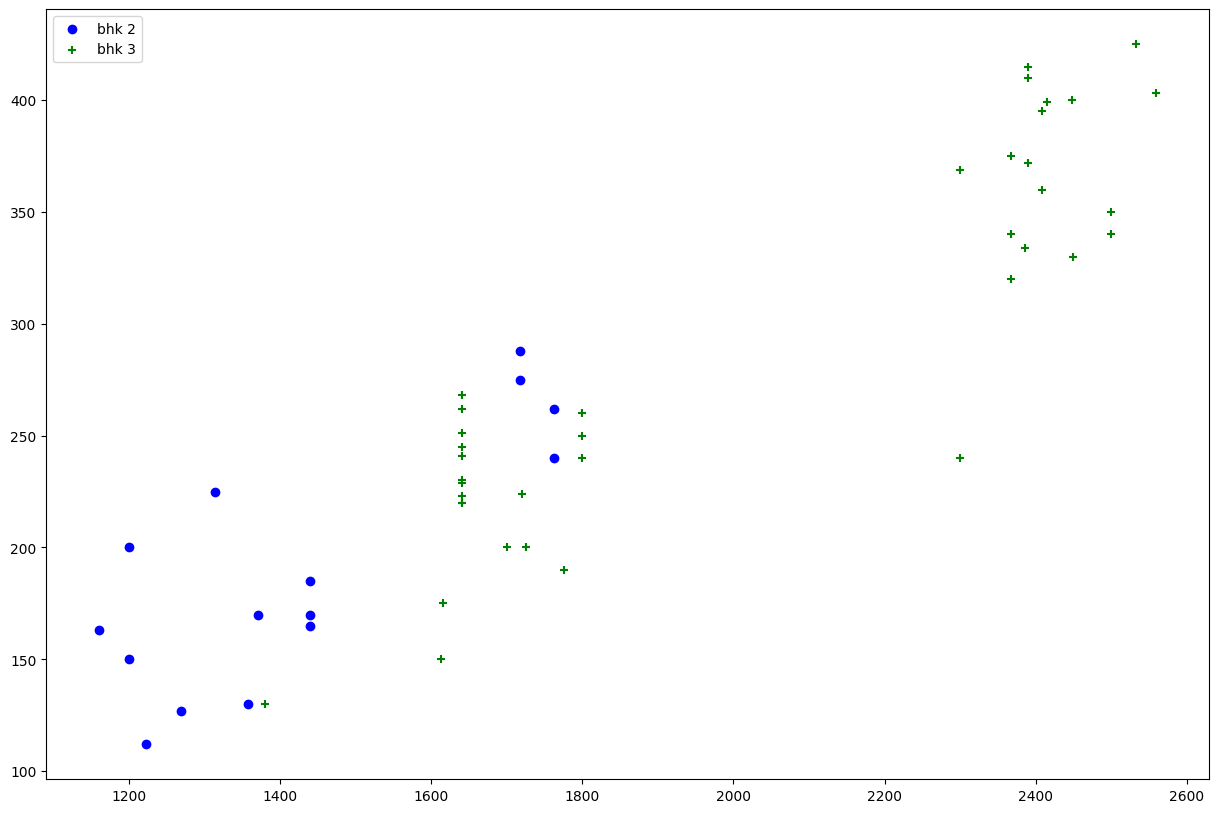

In [49]:
plot_scatter_chart(df7,"Rajaji Nagar")

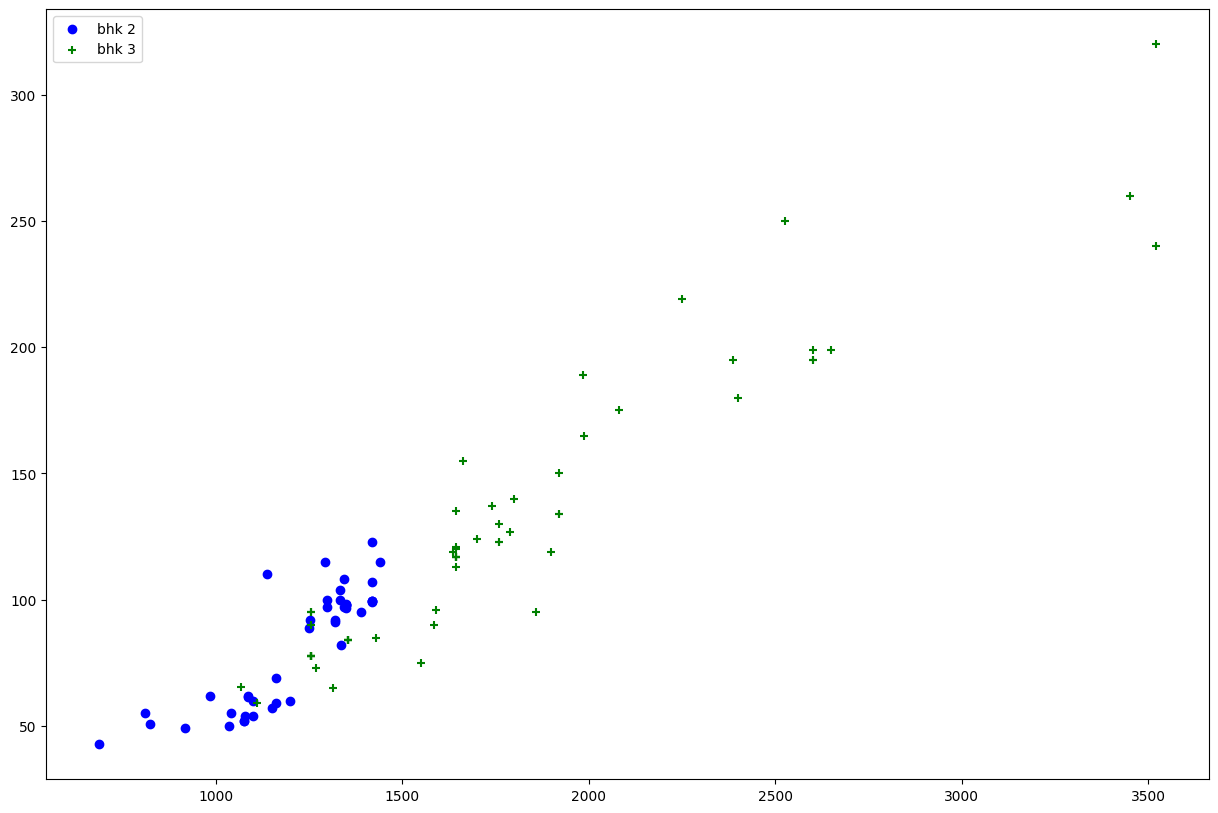

In [50]:
plot_scatter_chart(df7,"Hebbal")

In [51]:
'''a=0

for i,j in df7.groupby('location'):
  val ={}
  b=0
  a=a+1
  print('a ',a)
  for b1, b2 in j.groupby('bhk'):
    b=b+1
    print('b ',b)
    print(i)
    print(b1)
    print(b2)
    val[b1] = {
        'mean': np.mean(b2.price_per_sqft),
        'std': np.std(b2.price_per_sqft),
        'count': b2.shape[0]
    }

    print('------------------')
  print(val)
  print('****************')

'''

Streaming output truncated to the last 5000 lines.
6900     4170.804369  
6901     3464.566929  
6902     3178.484108  
6903     4854.368932  
6904     5416.666667  
6905     4025.157233  
6906     3400.000000  
6907     5000.000000  
6909     3962.264151  
6910     4400.000000  
6911     4239.130435  
6912     4263.959391  
6914     4375.000000  
6916     3873.873874  
6917     4273.504274  
6918     3215.847697  
6919     4000.000000  
------------------
b  3
Kengeri Satellite Town
3
                    location   size  total_sqft  bath  price  bhk  \
6896  Kengeri Satellite Town  3 BHK      1415.0   2.0   66.0    3   
6898  Kengeri Satellite Town  3 BHK      1635.0   2.0   78.0    3   
6915  Kengeri Satellite Town  3 BHK      1450.0   2.0   50.0    3   

      price_per_sqft  
6896     4664.310954  
6898     4770.642202  
6915     3448.275862  
------------------
{1: {'mean': 3416.085803355814, 'std': 180.47203987792676, 'count': 3}, 2: {'mean': 4161.885658225767, 'std': 587.9649928

In [60]:
df7.shape

(10291, 7)

In [63]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7376, 7)

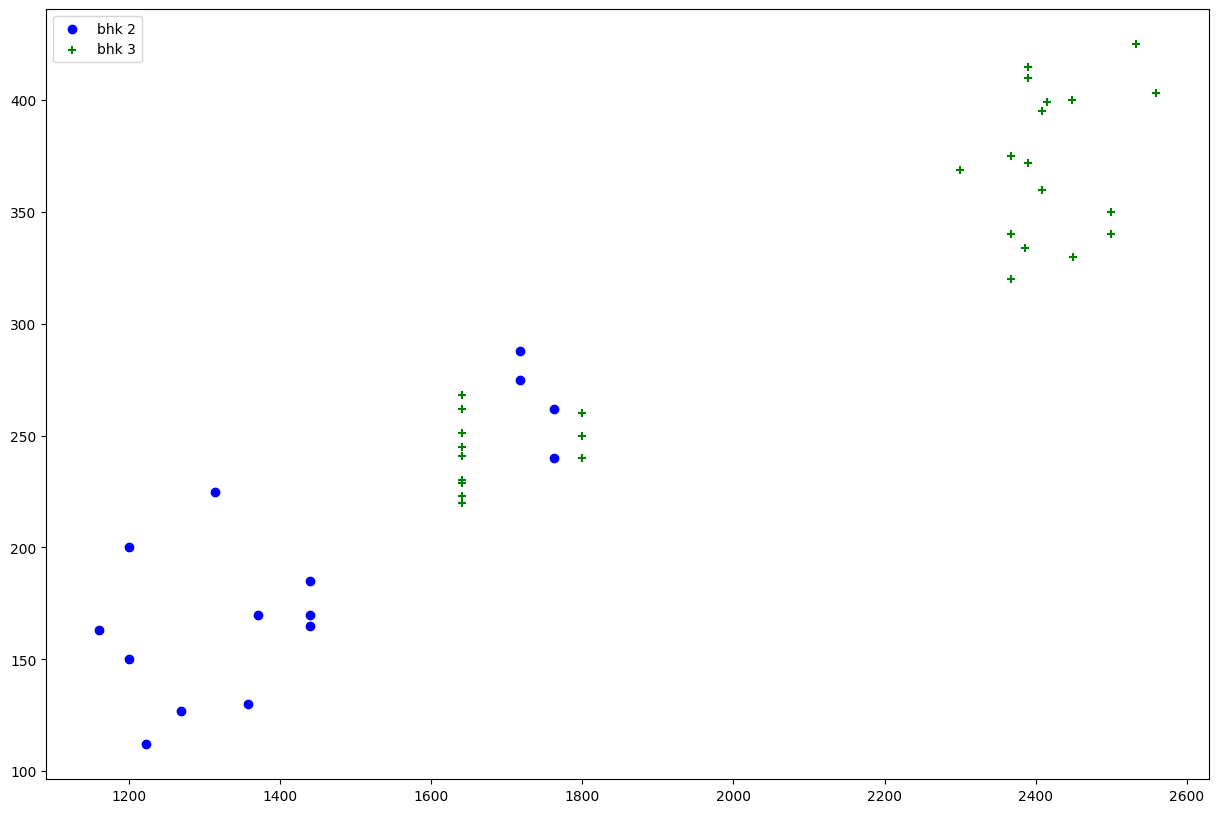

In [67]:
plot_scatter_chart(df8,"Rajaji Nagar")

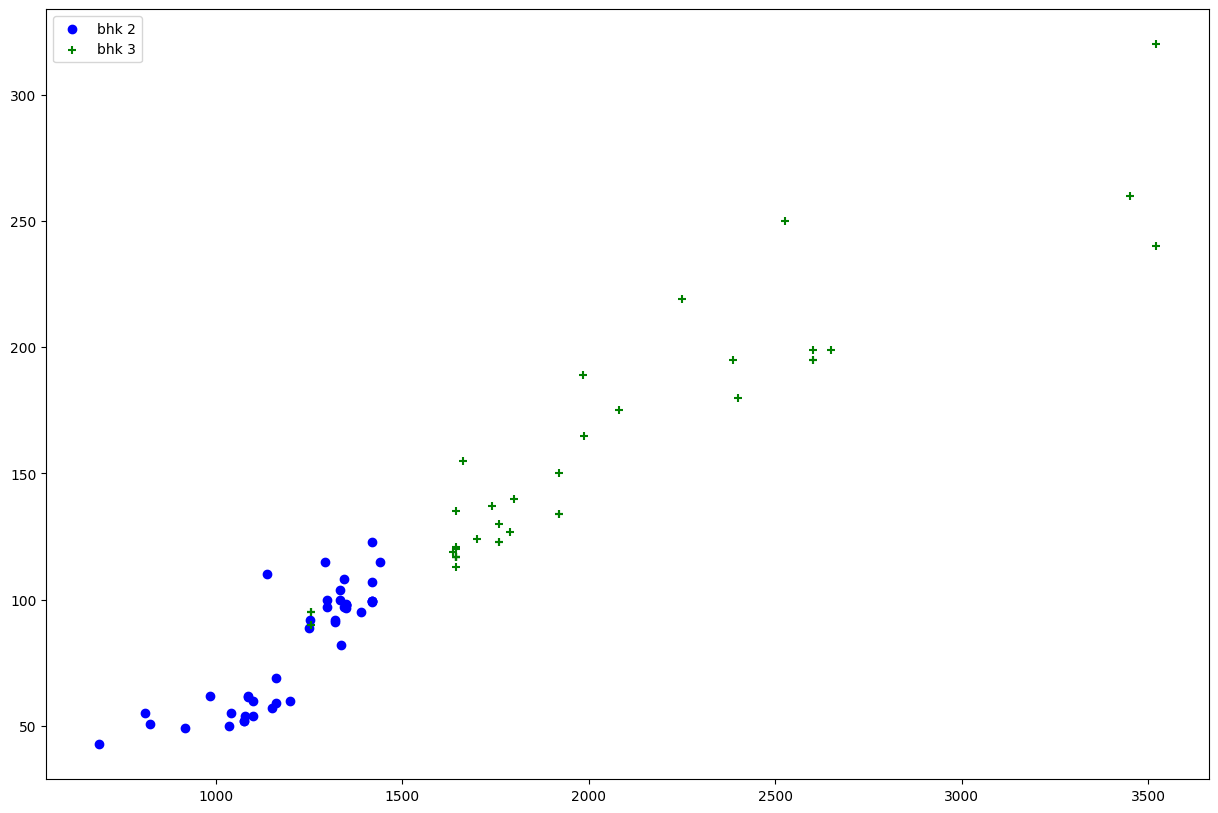

In [66]:
plot_scatter_chart(df8,"Hebbal")

Outlier Removal Using Bathrooms Feature

	if bathroom > bhk+2


In [68]:
df8

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Electronic City Phase II,2 BHK,1020.0,2.0,30.60,2,3000.000000
2,Electronic City Phase II,2 BHK,1069.0,2.0,45.00,2,4209.541628
3,Electronic City Phase II,1 BHK,630.0,1.0,28.35,1,4500.000000
5,Electronic City Phase II,2 BHK,1000.0,2.0,25.00,2,2500.000000
...,...,...,...,...,...,...,...
10286,Kadubeesanahalli,3 BHK,1365.0,3.0,80.00,3,5860.805861
10287,Kadubeesanahalli,2 BHK,1257.0,2.0,105.00,2,8353.221957
10288,Kadubeesanahalli,2 BHK,1184.0,2.0,55.00,2,4645.270270
10289,Kadubeesanahalli,2 BHK,1185.0,2.0,55.00,2,4641.350211


In [74]:
df8[df8.bath>(df8.bhk+2)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1575,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
4062,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
7179,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
9109,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520


In [77]:
df9 = df8[~(df8.bath> (df8.bhk+2))]

In [78]:
df9.shape

(7372, 7)



    Remove unwanted columns

In [79]:
df9.head(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Electronic City Phase II,2 BHK,1020.0,2.0,30.60,2,3000.000000
2,Electronic City Phase II,2 BHK,1069.0,2.0,45.00,2,4209.541628
3,Electronic City Phase II,1 BHK,630.0,1.0,28.35,1,4500.000000
5,Electronic City Phase II,2 BHK,1000.0,2.0,25.00,2,2500.000000


In [80]:
df10 = df9.drop(['size', 'price_per_sqft'], axis='columns')
df10.head(5)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Electronic City Phase II,1020.0,2.0,30.60,2
2,Electronic City Phase II,1069.0,2.0,45.00,2
3,Electronic City Phase II,630.0,1.0,28.35,1
5,Electronic City Phase II,1000.0,2.0,25.00,2


One Hot Encoding

In [81]:
df10.head(5)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Electronic City Phase II,1020.0,2.0,30.60,2
2,Electronic City Phase II,1069.0,2.0,45.00,2
3,Electronic City Phase II,630.0,1.0,28.35,1
5,Electronic City Phase II,1000.0,2.0,25.00,2


In [82]:
df10.groupby('location')['location'].agg('count')

,location
location,
1st Block Jayanagar,7
1st Phase JP Nagar,16
2nd Phase Judicial Layout,8
2nd Stage Nagarbhavi,6
5th Block Hbr Layout,6
...,...
Yelahanka,87
Yelahanka New Town,24
Yelenahalli,8


In [86]:
dummy = pd.get_dummies(df10['location'])

In [88]:
df11 = pd.concat([df10, dummy.drop('other', axis='columns')], axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Electronic City Phase II,1056.0,2.0,39.07,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Electronic City Phase II,1020.0,2.0,30.60,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Electronic City Phase II,1069.0,2.0,45.00,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Electronic City Phase II,630.0,1.0,28.35,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,Electronic City Phase II,1000.0,2.0,25.00,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [89]:
df11.shape

(7372, 246)

In [90]:
df12 = df11.drop('location', axis='columns')
df12.shape

(7372, 245)

#Build Model using LinearRegresion

    Train Test Split
    LinearRegression Model

In [91]:
df12.head(5)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1020.0,2.0,30.60,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1069.0,2.0,45.00,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,630.0,1.0,28.35,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1000.0,2.0,25.00,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [92]:
X = df12.drop('price', axis='columns')
X.shape

(7372, 244)

In [93]:
y= df12['price']
y.shape

(7372,)

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=10)

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
model = LinearRegression()

In [98]:
model.fit(xtrain, ytrain)

LinearRegression()

In [99]:
model.score(xtest,ytest)

0.8715024581470668

    Use K Fold cross validation to measure accuracy of our LinearRegression model

In [101]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.85763547, 0.85985057, 0.85061511, 0.78873334, 0.79375286])

    Find best model using GridSearchCV

In [103]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

,model,best_score,best_params
0,linear_regression,0.830625,"{'fit_intercept': False, 'positive': False}"
1,lasso,0.708157,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.616271,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


    Test the model for few properties

In [106]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [107]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


85.4734172451682

In [108]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.48048781159096

    Export the tested model to a pickle file

In [111]:
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/Projects/Real Estate Price Prediction/banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(model,f)

    Export location and column information to a file that will be useful later on in our prediction application

In [114]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("/content/drive/MyDrive/Colab Notebooks/Projects/Real Estate Price Prediction/columns.json","w") as f:
    f.write(json.dumps(columns))